In [1]:
import pandas as pd                       # Imports NumPy for numerical operations and array handling
import numpy as np                        # Imports Pandas for data manipulation and analysis
import matplotlib.pyplot as plt           # Imports Matplotlib for plotting and visualization
import seaborn as sns                     # Imports Seaborn for statistical data visualization
from mpl_toolkits.mplot3d import Axes3D   # Enables 3D plotting in Matplotlib

In [2]:
df = pd.read_csv("StudentsPerformance.csv")
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [3]:
df["total_score"] = df["math score"] + df["reading score"] + df["writing score"]

In [4]:
# 1.Who scores higher in math – boys or girls?
boys_girls=df.groupby("gender")["math score"].mean()
boys_girls.round(0)

gender
female    64.0
male      69.0
Name: math score, dtype: float64

In [5]:
# 2.Do students who took the test preparation course get better scores?
#better_course=df.groupby("test preparation course")["total_score"].mean()
#better_course.round(0)
test_preparation=df.groupby('test preparation course')[['math score', 'reading score', 'writing score']].mean().round(0)
test_preparation

,math score,reading score,writing score
test preparation course,,,
completed,70.0,74.0,74.0
none,64.0,67.0,65.0


In [6]:
# 3.Which parental education level is linked to the highest average scores?

linked =df.groupby("parental level of education")["total_score"].mean().sort_values(ascending=False).round(0)
linked
#sort_values(ascending=False) means sort in descending order from highest to lowest.

parental level of education
master's degree       221.0
bachelor's degree     216.0
associate's degree    209.0
some college          205.0
some high school      195.0
high school           189.0
Name: total_score, dtype: float64

In [7]:

buy_comp=df.groupby('parental level of education')[['math score', 'reading score', 'writing score']].mean().round(2)
buy_comp

,math score,reading score,writing score
parental level of education,,,
associate's degree,67.88,70.93,69.90
bachelor's degree,69.39,73.00,73.38
high school,62.14,64.70,62.45
master's degree,69.75,75.37,75.68
some college,67.13,69.46,68.84
some high school,63.50,66.94,64.89


In [8]:
# 4.Does lunch type (standard or free/reduced) affect student performance?

lunch=df.groupby("lunch")[["total_score"]].mean().round(0)
lunch

,total_score
lunch,
free/reduced,187.0
standard,213.0


In [9]:
By_subjectwise=df.groupby('lunch')[['math score', 'reading score', 'writing score']].mean().round(2)
By_subjectwise

,math score,reading score,writing score
lunch,,,
free/reduced,58.92,64.65,63.02
standard,70.03,71.65,70.82


In [10]:
# 5.Which subject has the highest average score overall?

aveg=df[["math score", "reading score", "writing score"]].round(2)
aveg.mean()


math score       66.089
reading score    69.169
writing score    68.054
dtype: float64

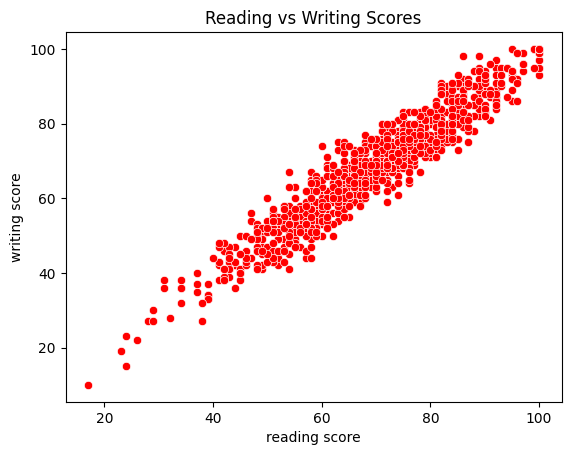

In [11]:
# 6.Are reading and writing scores closely related?

sns.scatterplot(x="reading score", y="writing score",data=df,color='red')
plt.title("Reading vs Writing Scores")
plt.show()

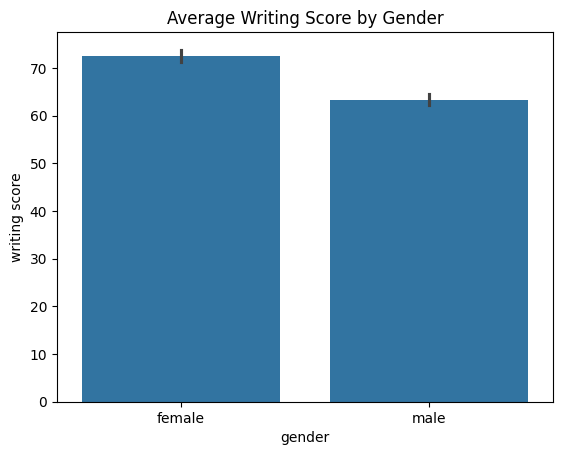

In [12]:
# 7.Is there a gender difference in writing scores?

sns.barplot(x="gender", y="writing score", data=df)
plt.title("Average Writing Score by Gender")
plt.show()

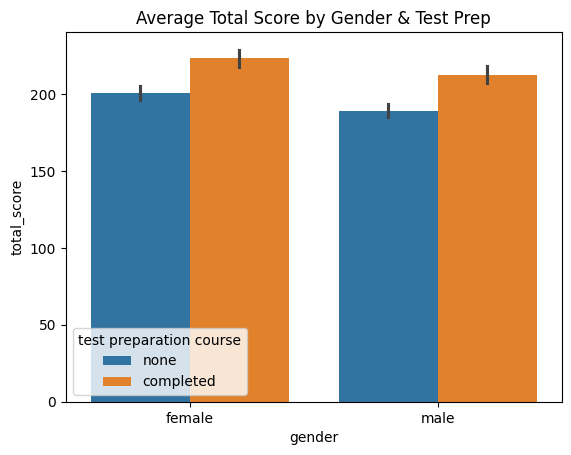

In [13]:
#8 .Which group (gender + test prep) has the best average scores?

sns.barplot(x="gender", y="total_score", hue="test preparation course", data=df)
plt.title("Average Total Score by Gender & Test Prep")
plt.show()

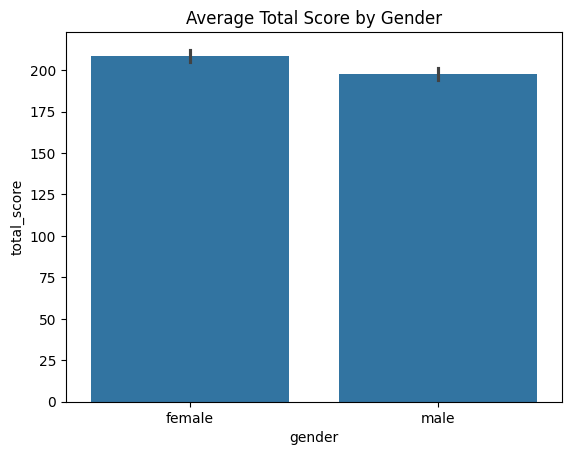

In [14]:
#9.What is the average total score for each gender?

sns.barplot(x="gender", y="total_score", data=df)
plt.title("Average Total Score by Gender")
plt.show()


In [15]:
# 10 How many students scored below 50 in any subject

below_50 = df[(df["math score"] < 50) | 
              (df["reading score"] < 50) | 
              (df["writing score"] < 50)]

below_50.shape[0]
## This filters all students who scored below 50 in any subject and .shape[0] gives the count of such students.


188

In [16]:
above_50 = df[(df["math score"] >= 50) & 
              (df["reading score"] >= 50) & 
              (df["writing score"] >= 50)]
above_50 .shape[0]

812

In [17]:
df.shape[0]#.shape[0] gives the count of such students.

1000